<h1><center> ComS 574     </center></h1>
<h1><center> HW 2 </center></h1>
<h1><center> Kanak Choudhury </center></h1>

# Problem 1

We know that 
$$\frac{P\left(y=1 	\mid x\right)}{1-P\left(y=1	\mid x\right)}=\beta_0+\beta_1 x $$
$$ \frac{P\left(y=1	\mid x\right)}{1-P\left(y=1	\mid x\right)} = 1.24−3.74 x $$

Now, if we consider $x = az$, where $x$ is measured in kilometers, $z$ is measured in miles and $a = 0.6214$, then we write-

\begin{align}
\frac{P\left(y = 1	\mid x\right)}{1-P\left(y=1	\mid x\right)} &= 1.24 - 3.74x \\
&= 1.24 − 3.74 \left( az\right)\\
&= 1.24 - a\times 3.74 z
\end{align}

So, Sammie’s estimated $\beta_0$ and $\beta_1$ will be

$$ \hat\beta_0 = 1.24$$
and   $$\hat\beta_1 = a\times3.74 = 0.6214\times 3.74 = 2.324$$

# Problem 2 (Book problem Chapter 4, \#4 )

## (a)

We have, $X$ is uniformly distributed on $\left[ 0, 1 \right]$. 
Now, 

$$ \begin{array}{c} x \in \left[ 0.05, 0.95 \right] \text{ represents fraction of } 0.10\\
x \in \left[ 0, 0.05 \right] \text{ and } x \in \left[ 0.95, 1 \right] \text{ represents fraction of } \left( x + 0.05 \right)
\end{array}
$$

So,

$$
\int_{0.05}^{0.95} 0.1 dx + \int_{0}^{0.05} \left( x + 0.05 \right) dx + \int_{0.95}^{1} \left( x + 0.05 \right) dx = 0.09 + 0.00375 + 0.00375 = 0.0975
$$

Thus, on average, about $0.0975$ fraction of the available observations will be used to make the prediction.

## (b)

Let, $X_1$ and $X_2$ be independent. Then the fraction of the available observations will be used to make the prediction is-

$$ 0.0975 \times 0.0975 = 0.009506
$$

## (c)

If we consider all $X_i$ $i=1, 2, ..., 100$ are independent, then the fraction of the available observations will be used to make the prediction is

$$
{0.0975}^{p} = {0.0975}^{100} \approx 0 \quad \quad \text{where $p$ is the number of features}
$$

## (d)

From the above problem, we see that as the number of features $p\rightarrow \infty$ he fraction of the available observations $\rightarrow 0$, implies that  there are very few training observations “near” any given test observation.

## (e)

 For $p =1, 2$, and $100$, the length of each side of the hypercube are-
$$
 p=1:  length = 0.1\\
 p=2:  length = 0.1^{\frac{1}{2}} = 0.31623\\
 p=100:  length = 0.1^{\frac{1}{100}} = 0.97724
$$

# Problem 3 (Book problem Chapter 4, \#6 )

## (a)

Estimated probability that a student who studies for 40h and has an undergrad GPA of 3.5 gets an A in the class is - 
$$P\left(y=1|x\right) = \frac{exp\left(\hat\beta_0+\hat\beta_1 X_1 + \hat\beta_2 X_2\right)}{1 + exp\left(\hat\beta_0+\hat\beta_1 X_1 + \hat\beta_2 X_2\right)}$$
$$P\left(y=1|x\right) = \frac{exp \left(-6 + 0.05 \times 40 + 3.5\right)}{1 + exp \left(-6 + 0.05 \times 40 + 3.5\right)}=0.3775$$

## (b)

$$P\left(y=1|x\right) = \frac{exp \left(-6 + 0.05 \times X_1 + 3.5\right)}{1 + exp \left(-6 + 0.05 \times X_1 + 3.5\right)}=0.5$$


Hours need to study to have a $50\%$ chance of getting an $A$ in the class is-
$$X_1 = 50$$

# Problem 4 (Book problem Chapter 4, \#8 )

For the logistic regression we have an error rate of $20\%$ on the training data and $30\%$ on the test data. And for $1-$-nearest neighbors, the average error rate (averaged over both test and training data sets) is $18\%$. For $1-$-nearest neighbors, the trainng error will $0\%$. Thus, the testing error rate is $36\%$ for the $1-$-nearest neighbors. Thus, we should prefer to use **logistic regression classiﬁer** for new observations because it has lower test error, $30\%$.

# Problem 5


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as kn


## (A)

In [21]:
df_train = pd.read_csv('D:/ISU/COMS 574 - Introduction to Machine Learning/HW/HW2/HW2train.csv', sep=',', 
                       header=None, names=["Y", "X"])
df_test = pd.read_csv('D:/ISU/COMS 574 - Introduction to Machine Learning/HW/HW2/HW2test.csv', sep=',', 
                      header=None, names=["Y", "X"])
tr_size = df_train.shape
ts_size = df_test.shape

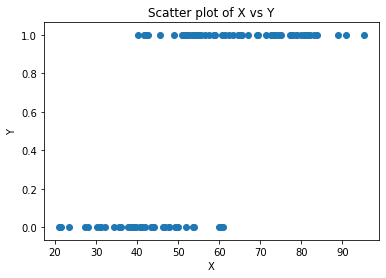

In [22]:
plt.scatter(df_train['X'], df_train['Y'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of X vs Y")
plt.show()

## (B)

beta_0 = -9.0587 and beta_1 = 0.1835
LR Accuracy for HW2train 86.00%
LR Accuracy for HW2test 82.00%


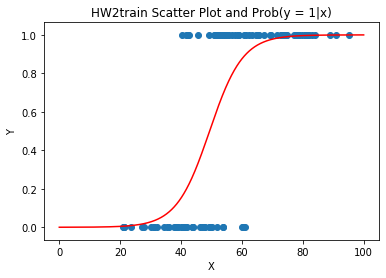

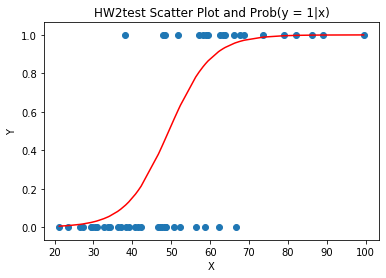

In [23]:
x_train = np.array(df_train[['X']])
y_train = np.array(df_train[['Y']])
model = lr(penalty='none', fit_intercept=True, solver='lbfgs').fit(x_train, y_train.ravel())

print("beta_0 = %.4f and beta_1 = %.4f" %(model.intercept_, model.coef_))
print("LR Accuracy for HW2train %.2f%%" %(model.score(x_train, y_train)*100))

gen_x = np.linspace(0,100, num = 1000)
prob_gen = model.predict_proba(gen_x.reshape(1000,-1))

ts_x = np.array(df_test['X'])
ts_y = np.array(df_test['Y'])
prob_ts = model.predict_proba(ts_x.reshape(ts_size[0],-1))

print("LR Accuracy for HW2test %.2f%%" %(model.score(ts_x.reshape(ts_size[0],-1), ts_y)*100))


plt.scatter(df_train['X'], df_train['Y'])
plt.plot(gen_x, prob_gen[:,1], color = 'red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("HW2train Scatter Plot and Prob(y = 1|x)")
plt.show()

plt.scatter(ts_x, ts_y)
plt.plot(ts_x[np.argsort(ts_x)], prob_ts[:,1][np.argsort(ts_x)], color = 'red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("HW2test Scatter Plot and Prob(y = 1|x)")
plt.show()

## (C)
### (1)

KNN Accuracy for HW2train using score() function- 100.00%
KNN(1) Accuracy for HW2test 70.00%


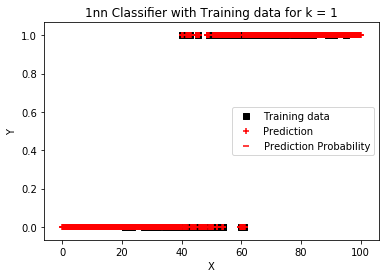

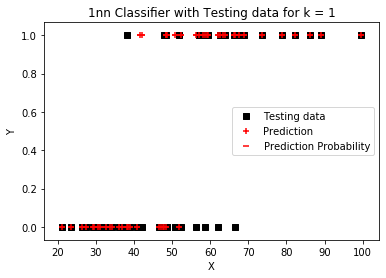

KNN Accuracy for HW2train using score() function- 90.00%
KNN(3) Accuracy for HW2test 80.00%


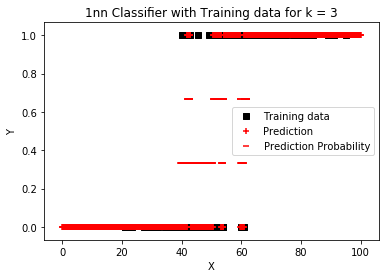

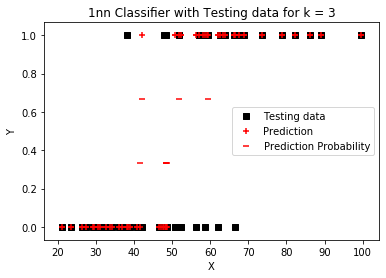

KNN Accuracy for HW2train using score() function- 86.00%
KNN(9) Accuracy for HW2test 82.00%


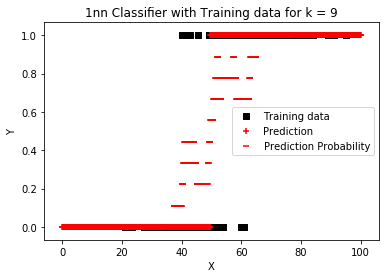

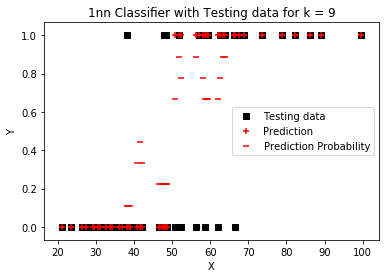

In [24]:
for i in [1,3,9]:
    model_kn = kn(n_neighbors=i, weights='uniform', algorithm='auto').fit(x_train, y_train.ravel())
    

    gen_x = np.linspace(0,100, num = 1000)
    pred_knn_gen = model_kn.predict(gen_x.reshape(1000,-1))
    pred_knn_gen_pr = model_kn.predict_proba(gen_x.reshape(1000,-1))


    ts_x = np.array(df_test['X'])
    ts_y = np.array(df_test['Y'])
    prob_ts_pr = model_kn.predict_proba(ts_x.reshape(ts_size[0],-1))
    prob_ts = model_kn.predict(ts_x.reshape(ts_size[0],-1))

    print("KNN Accuracy for HW2train using score() function- %.2f%%" %(model_kn.score(x_train, y_train)*100))
    print("KNN(%d) Accuracy for HW2test %.2f%%" %(i, model_kn.score(ts_x.reshape(ts_size[0],-1), ts_y)*100))


    x_tr = x_train.flatten()
    a1 = plt.scatter(df_train['X'], df_train['Y'], color = 'black', label = 'Training data', marker = 's')
    a2 = plt.scatter(gen_x, pred_knn_gen, color = 'r', marker='+',  label = 'Prediction class')
    a3 = plt.scatter(gen_x, pred_knn_gen_pr[:,1], color = 'red', marker='_', label = 'Prediction Probability')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("1nn Classiﬁer with Training data for k = %i" %i)
    plt.legend([a1, a2, a3], ['Training data', 'Prediction', 'Prediction Probability'])
    plt.show()
    
    a1 = plt.scatter(ts_x, ts_y, color = 'black', label = 'Testing data', marker = 's')
    a2 = plt.scatter(ts_x[np.argsort(ts_x)], prob_ts[np.argsort(ts_x)], 
                     color = 'r', marker='+', label = 'Prediction class')
    a3 = plt.scatter(ts_x[np.argsort(ts_x)], prob_ts_pr[:,1][np.argsort(ts_x)], 
                     color = 'red', marker='_', label = 'Prediction Probability')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("1nn Classiﬁer with Testing data for k = %i" %i)
    plt.legend([a1, a2, a3], ['Testing data', 'Prediction', 'Prediction Probability'])
    plt.show()

## (C)
### (2) - (3)

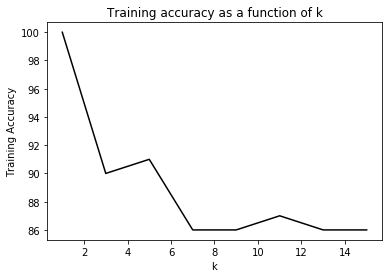

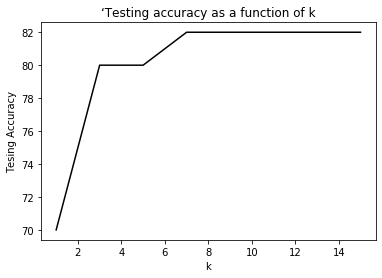

In [26]:
tr_acc = []
ts_acc = []
k = []
for i in range(1, 16):
    if i % 2 != 0:
        model_kn = kn(n_neighbors=i, weights='uniform', algorithm='auto').fit(x_train, y_train.ravel())
        k.append(i)
        tr_acc.append(model_kn.score(x_train, y_train)*100)
        ts_acc.append(model_kn.score(ts_x.reshape(ts_size[0],-1), ts_y)*100)


plt.plot(k, tr_acc, color = 'black')
plt.xlabel("k")
plt.ylabel("Training Accuracy")
plt.title("Training accuracy as a function of k")
plt.show()

plt.plot(k, ts_acc, color = 'black')
plt.xlabel("k")
plt.ylabel("Tesing Accuracy")
plt.title("‘Testing accuracy as a function of k")
plt.show()

## (D)

Based on test accuracy, nearest neighbor for $k = 9$ is the best ($82\%$ accuracy). Definitely, nearest neighbor for $k = 1$ over-fits the data ($100\%$ accuracy for the training data and $70\%$ accuracy for the test data). From the accuracy plots for different $k$ values, testing accuracy for $k = 7$ and higher is almost same that indicates nearest neighbor for $k = 7$ is the best model for this data. Both logistic regression and KNN model for $k = 9$ has the same training and testing accuracy. However, in the training data proportion of response for $Y = 1$ is about $60\%$ which indicates that the optimal cutoff probability may not be exactly $0.5$ that is what we have used in this problem to classify new data. If we can find the optimal cutoff probability, it may be possible to find the better training and testing accuracy for this data. 

$$--END--$$